In [1]:
import pandas as pd
import seaborn as sns

In [2]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

<AxesSubplot:>

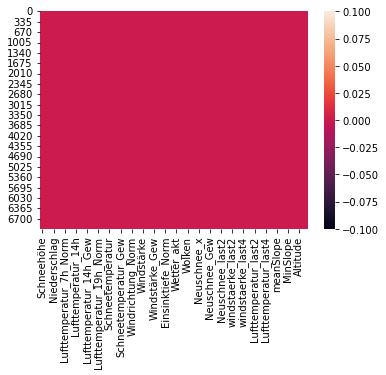

In [3]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()


sns.heatmap(avalanche_set.isna())

In [4]:
from sklearn_genetic.plots import plot_fitness_evolution
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

#estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="accuracy",
    population_size=60,
    generations=50,
    crossover_probability=0.2,
    mutation_probability=0.8,
    tournament_size=3,
    elitism=True,
    max_features=None,
    verbose=True,
    n_jobs=-1)

# Train and select the features
evolved_estimator.fit(X, y)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	60    	0.704055	0.0140015  	0.725102   	0.666274   
1  	120   	0.71504 	0.00643952 	0.727096   	0.699175   
2  	120   	0.719929	0.00336845 	0.725954   	0.712419   
3  	120   	0.722256	0.00262232 	0.726951   	0.716553   
4  	120   	0.724215	0.00155806 	0.726951   	0.71983    
5  	120   	0.725354	0.00156256 	0.729942   	0.721539   
6  	120   	0.72623 	0.00146003 	0.729942   	0.722108   
7  	120   	0.726921	0.00148903 	0.729515   	0.722677   
8  	120   	0.727895	0.00124878 	0.729797   	0.724817   
9  	120   	0.728568	0.00115511 	0.729799   	0.724673   
10 	120   	0.729104	0.000814342	0.730083   	0.726384   
11 	120   	0.729422	0.000744584	0.731081   	0.726955   
12 	120   	0.729791	0.000885602	0.731936   	0.727094   
13 	120   	0.730566	0.000723539	0.731936   	0.729087   
14 	120   	0.730757	0.00106078 	0.732078   	0.727664   
15 	120   	0.730937	0.000833502	0.732078   	0.727378   
16 	120   	0.731236	0.000857027	0.732078   	0.72

GAFeatureSelectionCV(cv=10,
                     estimator=Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('lineardiscriminantanalysis',
                                                LinearDiscriminantAnalysis())]),
                     generations=50, n_jobs=-1, population_size=60,
                     return_train_score=True, scoring='accuracy')

In [5]:

selected_features = evolved_estimator.best_features_
for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print("\'" + feature_names[i] + "\',")

'Schneehöhe',
'Niederschlag',
'Lufttemperatur_14h',
'Lufttemperatur_14h_Gew',
'Lufttemperatur_19h',
'Schneetemperatur_Gew',
'Einsinktiefe',
'Einsinktiefe_Gew',
'Wetter_akt',
'Neuschnee_x',
'Neuschnee_Norm',
'windstaerke_last2',
'windstaerke_last3',
'windstaerke_last4',
'Lufttemperatur_last2',
'Lufttemperatur_last3',
'Lufttemperatur_last4',
'meanExpo',
'meanSlope',
'stdDevSlope',
'MinSlope',
'MaxSlope',
'Altitude',


In [6]:
print(evolved_estimator.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])


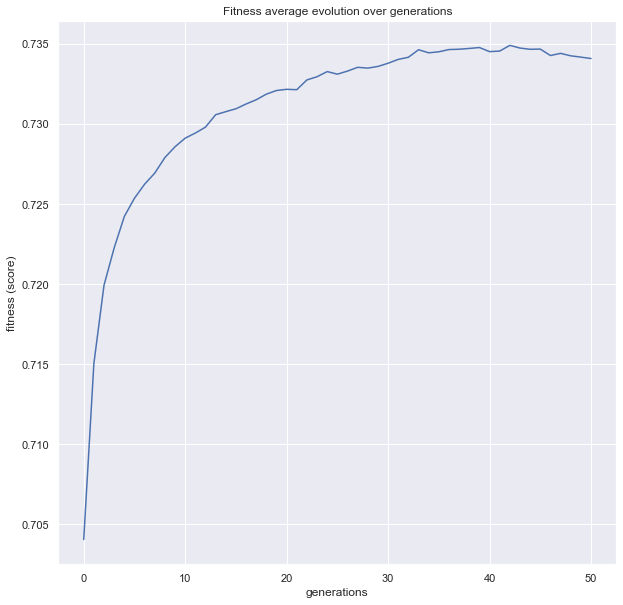

In [7]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()